In [453]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sym
import warnings
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt
from scipy import signal

# Filtro FIR

### Functions and signal parameters

In [454]:
def f(x):
    #return np.cos(2*60*np.pi*x) + 2*np.cos(2*600*np.pi*x) # Function
    return 2*np.cos(2*80*np.pi*x) + np.cos(2*180*np.pi*x)

def hdSin(x, wc, M):
    return np.sin(wc*(x-M))/(np.pi*(x-M))

SPoints = 100


Text(0.5, 1.0, 'Function Y')

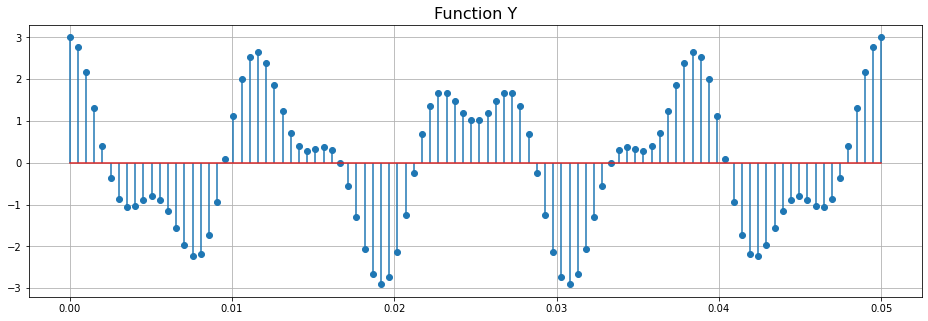

In [455]:
Lims = [0,5e-2]   # Sample limits
Fs = 2000 # Sample frequency

SPoints = int(Fs*(Lims[1] - Lims[0]))    # Sample points
print(f"SPoints = {SPoints}")
Xs = np.linspace(Lims[0],Lims[1],SPoints)
Ys = f(Xs)

plt.figure(figsize=(16,5))
plt.grid(True)
plt.stem(Xs,Ys)
plt.title("Function Y", fontsize=16)

### Window parameters

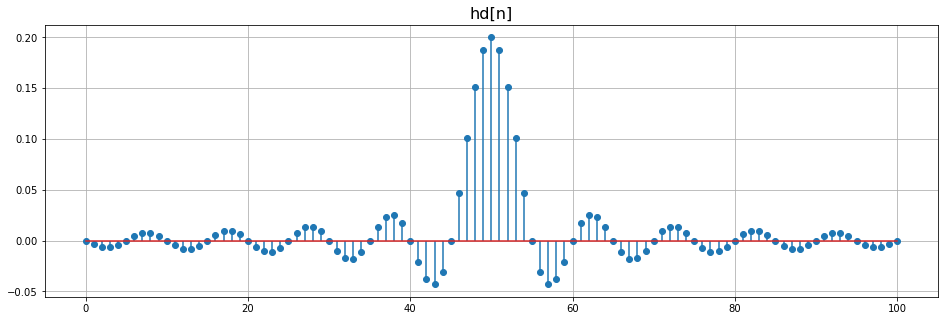

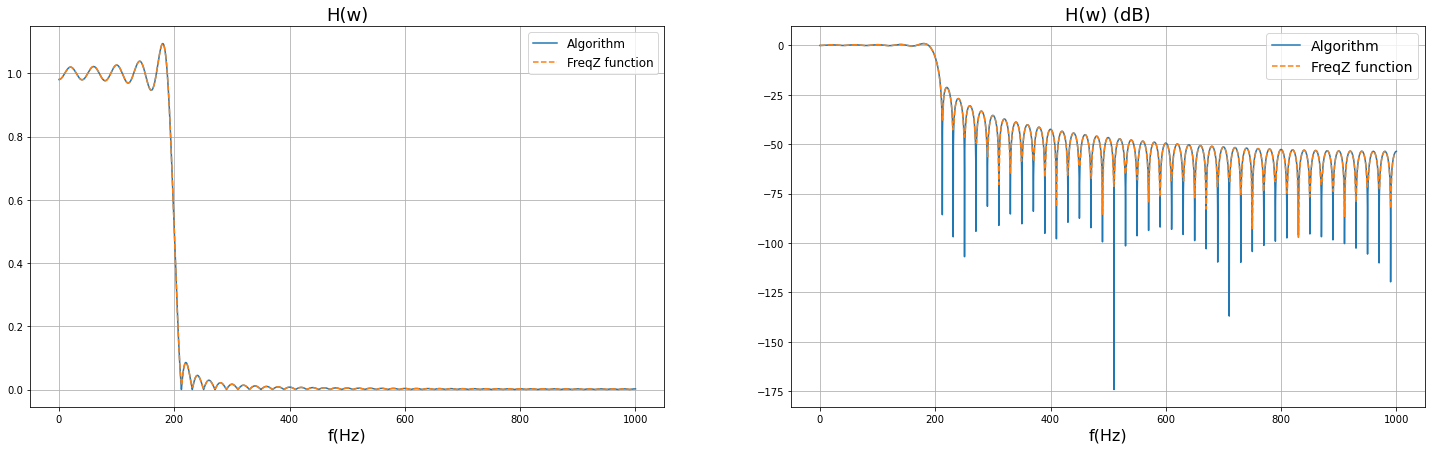

In [459]:
FOrder = 100 # Filter order
CutF = 200 # Cutoff frequency (Hz)

wc = 2*np.pi*CutF/Fs
w = np.ones(FOrder+1)
hd = np.zeros(FOrder+1)

for i in range(FOrder+1): # Window inverse transform
    if(i == FOrder/2):
        hd[i] = wc/np.pi
    else:
        hd[i] = hdSin(i,wc,FOrder/2) 

plt.figure(figsize=(16,5))
plt.grid(True)
plt.stem(np.arange(0,len(hd),1),hd)
plt.title("hd[n]", fontsize=16)

h = np.multiply(w,hd)
FreqPoints = 10000  # Frequency points for calculing H(n)

NormW = np.linspace(0, 0.5*2*np.pi, FreqPoints)
HArray = np.zeros(FreqPoints, dtype=complex)
for j in range(len(NormW)):  # Z Transform loop
    HResp = 0
    for i in range(len(h)):
        HResp = HResp + h[i]*np.exp(-1j*NormW[j]*i)
    HArray[j] = HResp
    
w , H = signal.freqz(hd,fs=Fs) # FreqZ function calculation

figure, ax = plt.subplots(1,2,figsize=(25,7))
ax[0].grid(True)
ax[0].plot(Fs*NormW/(2*np.pi),np.abs(HArray), label="Algorithm")
ax[0].plot(w,np.abs(H), "--", label="FreqZ function")
ax[0].set_title("H(w)", fontsize=18)
ax[0].set_xlabel("f(Hz)", fontsize=16)
ax[0].legend(fontsize=12)

ax[1].grid(True)
ax[1].plot(Fs*NormW/(2*np.pi),20*np.log10(np.abs(HArray)), label="Algorithm")
ax[1].plot(w,20*np.log10(np.abs(H)), "--", label="FreqZ function")
ax[1].set_title("H(w) (dB)", fontsize=18)
ax[1].set_xlabel("f(Hz)", fontsize=16)
ax[1].legend(fontsize=14)

### Output Signal

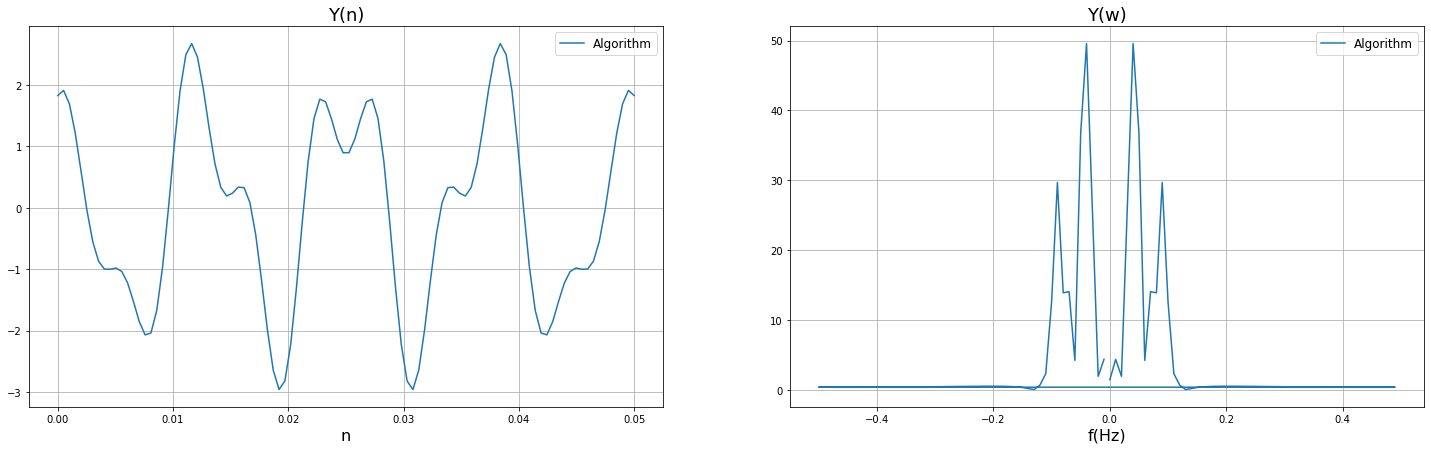

In [460]:
w , H = signal.freqz(hd,fs=Fs) # FreqZ function calculation

con = np.convolve(Ys,hd)
conLen1 = int(len(con)/2 -SPoints/2)
conLen2 = int(len(con)/2 +SPoints/2)
figure, ax = plt.subplots(1,2,figsize=(25,7))
ax[0].grid(True)
ax[0].plot(Xs,con[conLen1 : conLen2], label="Algorithm")
ax[0].set_title("Y(n)", fontsize=18)
ax[0].set_xlabel("n", fontsize=16)
ax[0].legend(fontsize=12)

ax[1].grid(True)
ax[1].plot(np.fft.fftfreq(SPoints),np.abs(np.fft.fft(con[0:SPoints])), label="Algorithm")
ax[1].set_title("Y(w)", fontsize=18)
ax[1].set_xlabel("f(Hz)", fontsize=16)
ax[1].legend(fontsize=12)

# Filtro IIR

Order(N) = 2
Cutoff = 1.3083165040420197


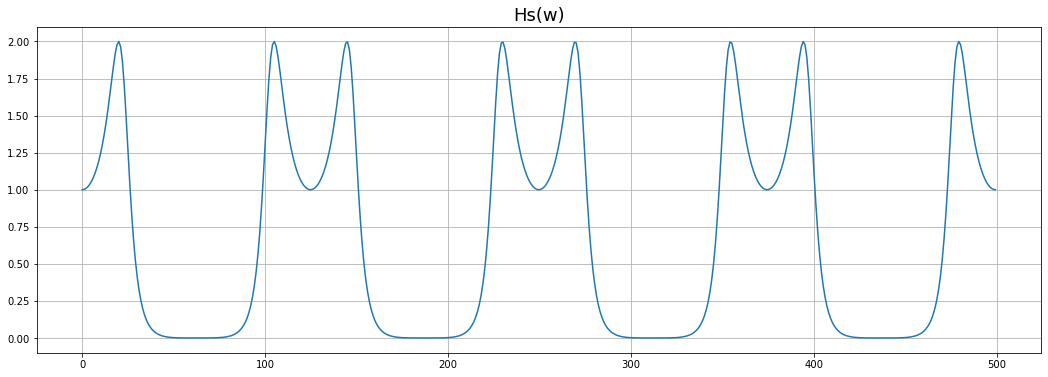

In [493]:
wp = 0.2*np.pi # Passband edge
ws = 0.5*np.pi # Stopband edge
AttS = 15 # Stopband attenuation (in dB)
AttP = 2 # Passband attenuation (in dB)

OmegaS = (np.tan(ws/2) / np.tan(wp/2))
OmegaC = OmegaS/((10**(np.abs(AttS)/10)-1)**(1/4))
N = int( np.ceil((np.log10((10**(np.abs(AttS)/10)-1) / (10**(np.abs(AttP)/10)-1))) / (2*np.log10(OmegaS))) )
print(f'Order(N) = {N}')
print(f'Cutoff = {OmegaC}')

sk = np.zeros(N, dtype=complex)
for i in range(N):
    sk[i] = np.exp(1j*np.pi/2 * (2*i+1+N)/N)

FPoints = 500 # Frequency points
FRange = np.linspace(0, 2*4*np.pi, FPoints)
HsArray = np.ones(FPoints, dtype=complex) # H(s) expression
for i in range(FPoints):
    for j in range(N):
        ParameterS = ((1-np.exp(-1j*FRange[i]))/(1+np.exp(-1j*FRange[i])))**2
        HsArray[i] = HsArray[i] * 1/(ParameterS/(OmegaC*np.tan(wp/2)) - sk[j])

plt.figure(figsize=(18,6))
plt.grid(True)
plt.title('Hs(w)', fontsize=18)
plt.plot(np.arange(0,500,1),np.abs(HsArray))


In [507]:
def mfreqz(b, a, Fs):

	# Compute frequency response of the filter
	# using signal.freqz function
	wz, hz = signal.freqz(b, a)

	# Calculate Magnitude from hz in dB
	Mag = 20*np.log10(abs(hz))

	# Calculate phase angle in degree from hz
	Phase = np.unwrap(np.arctan2(np.imag(hz), np.real(hz)))*(180/np.pi)

	# Calculate frequency in Hz from wz
	Freq = wz*Fs/(2*np.pi)

	# Plot filter magnitude and phase responses using subplot.
	fig = plt.figure(figsize=(10, 6))

	# Plot Magnitude response
	sub1 = plt.subplot(2, 1, 1)
	sub1.plot(Freq, Mag, 'r', linewidth=2)
	sub1.axis([1, Fs/2, -100, 5])
	sub1.set_title('Magnitude Response', fontsize=20)
	sub1.set_xlabel('Frequency [Hz]', fontsize=20)
	sub1.set_ylabel('Magnitude [dB]', fontsize=20)
	sub1.grid()

	# Plot phase angle
	sub2 = plt.subplot(2, 1, 2)
	sub2.plot(Freq, Phase, 'g', linewidth=2)
	sub2.set_ylabel('Phase (degree)', fontsize=20)
	sub2.set_xlabel(r'Frequency (Hz)', fontsize=20)
	sub2.set_title(r'Phase response', fontsize=20)
	sub2.grid()

	plt.subplots_adjust(hspace=0.5)
	fig.tight_layout()
	plt.show()

# Define impz(b,a) to calculate impulse response
# and step response of a system
# input: b= an array containing numerator coefficients,
# a= an array containing denominator coefficients
def impz(b, a):
	
	# Define the impulse sequence of length 60
	impulse = np.repeat(0., 60)
	impulse[0] = 1.
	x = np.arange(0, 60)

	# Compute the impulse response
	response = signal.lfilter(b, a, impulse)

	# Plot filter impulse and step response:
	fig = plt.figure(figsize=(10, 6))
	plt.subplot(211)
	plt.stem(x, response, 'm', use_line_collection=True)
	plt.ylabel('Amplitude', fontsize=15)
	plt.xlabel(r'n (samples)', fontsize=15)
	plt.title(r'Impulse response', fontsize=15)

	plt.subplot(212)
	step = np.cumsum(response) # Compute step response of the system

	plt.stem(x, step, 'g', use_line_collection=True)
	plt.ylabel('Amplitude', fontsize=15)
	plt.xlabel(r'n (samples)', fontsize=15)
	plt.title(r'Step response', fontsize=15)
	plt.subplots_adjust(hspace=0.5)

	fig.tight_layout()
	plt.show()


OmegaC = 1.3083165040420197
Order of the filter= 3
Cut-off frequency= 0.002187008988078507


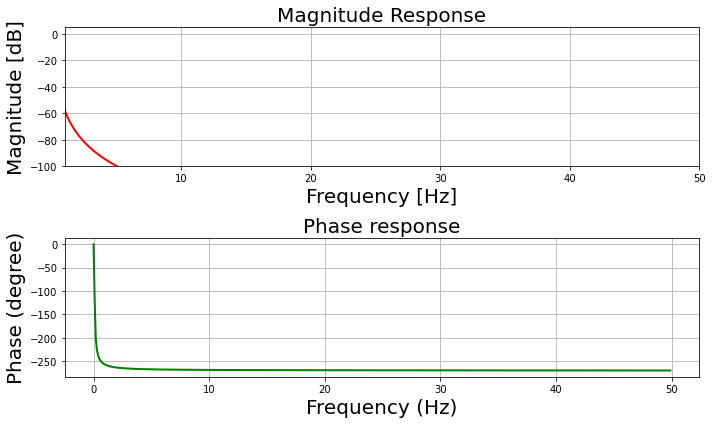

/tmp/ipykernel_59944/351586943.py:57: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, response, 'm', use_line_collection=True)
/tmp/ipykernel_59944/351586943.py:65: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, step, 'g', use_line_collection=True)


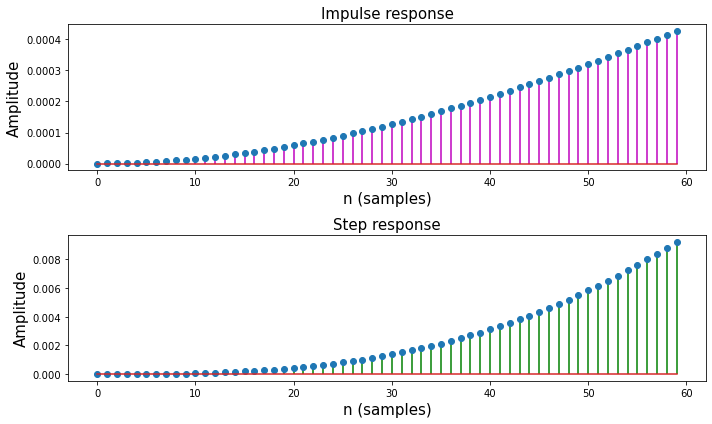

In [545]:
# Given specification
Fs = 100 # Sampling frequency in Hz
fp = 0.1 # Pass band frequency in Hz
fs = 0.25 # Stop band frequency in Hz
Ap = 2 # Pass band ripple in dB
As = 15 # stop band attenuation in dB


# Compute pass band and stop band edge frequencies
wp = fp/(Fs/2) # Normalized passband edge frequencies w.r.t. Nyquist rate
ws = fs/(Fs/2) # Normalized stopband edge frequencies

# Compute order of the digital Butterworth filter using signal.buttord
N, wc = signal.buttord(wp, ws, Ap, As, analog=True)
print(f'OmegaC = {OmegaC}')

# Print the order of the filter and cutoff frequencies
print('Order of the filter=', N)
print('Cut-off frequency=', wc)

# Design digital Butterworth band pass
# filter using signal.butter function
z, p = signal.butter(N, wc)

# Print numerator and denomerator
# coefficients of the filterrint('Denominator Coefficients:', p)

def mfreqz(b, a, Fs):
   
    # Compute frequency response of the filter
    # using signal.freqz function
    wz, hz = signal.freqz(b, a)
 
    # Calculate Magnitude from hz in dB
    Mag = 20*np.log10(abs(hz))
 
    # Calculate phase angle in degree from hz
    Phase = np.unwrap(np.arctan2(np.imag(hz), np.real(hz)))*(180/np.pi)
 
    # Calculate frequency in Hz from wz
    Freq = wz*Fs/(2*np.pi)
 
    # Plot filter magnitude and phase responses using subplot.
    fig = plt.figure(figsize=(10, 6))
 
    # Plot Magnitude response
    sub1 = plt.subplot(2, 1, 1)
    sub1.plot(Freq, Mag, 'r', linewidth=2)
    sub1.axis([1, Fs/2, -100, 5])
    sub1.set_title('Magnitude Response', fontsize=20)
    sub1.set_xlabel('Frequency [Hz]', fontsize=20)
    sub1.set_ylabel('Magnitude [dB]', fontsize=20)
    sub1.grid()
 
    # Plot phase angle
    sub2 = plt.subplot(2, 1, 2)
    sub2.plot(Freq, Phase, 'g', linewidth=2)
    sub2.set_ylabel('Phase (degree)', fontsize=20)
    sub2.set_xlabel(r'Frequency (Hz)', fontsize=20)
    sub2.set_title(r'Phase response', fontsize=20)
    sub2.grid()
 
    plt.subplots_adjust(hspace=0.5)
    fig.tight_layout()
    plt.show()

# Call mfreqz to plot the magnitude and phase response
mfreqz(z, p, Fs)

# Call impz function to plot impulse
# and step response of the filter
impz(z, p)